In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv(
    './data_01/01. CCTV_in_Seoul.csv'
    , encoding='utf-8'
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [3]:
# 컬럼 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

##### '기관명' => '구별' 컬럼명으로 변경
- 컬럼명을 바꾸는 메소드 : rename()
- inplace=True : 원본 반영
- CCTV_Seoul.columns[0] : '기관명' 컬럼명

In [4]:
CCTV_Seoul.rename(
    columns={CCTV_Seoul.columns[0]:'구별'}
    , inplace=True # 원본에 반영
)
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


#### 엑셀파일 => DataFrame 으로 읽기 : 서울시 인구현황
- read_excel()

In [5]:
pop_Seoul = pd.read_excel(
    './data_01/01. population_in_Seoul.xls'
    , header=2 # 제거할 title 수 지정
    , usecols='B,D,G,J,N' # 가져올 컬럼 지정 
#     , encoding ='utf-8'
)
pop_Seoul.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


#### 컬럼명 변경 
- 기존 컬럼명 : 자치구 계	   계.1	  계.2	65세이상고령자
- 변경 컬럼명 : 구별   인구수  한국인   외국인   고령자

In [6]:
pop_Seoul.rename(
    columns={
          pop_Seoul.columns[0] : '구별' # 자치구 
        , pop_Seoul.columns[1] : '인구수' # 계
        , pop_Seoul.columns[2] : '한국인' # 계.1
        , pop_Seoul.columns[3] : '외국인' # 계.2
        , pop_Seoul.columns[4] : '고령자' # 65세 이상 고령자
    }
    , inplace=True # 원본에 바로 반영
)

In [7]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


---
## Pandas 기초
---
### 날짜 데이터 생성

In [8]:
dates = pd.date_range('20210401', periods=7, freq='D') # 하루씩 증가 만들기
dates 

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

- DatetimeIndex => 데이터타입을 인덱스로 만들 수 있음
- index는 key로 사용

연속되는 데이터를 만들 때 사용
- freq 가 중요!

In [9]:
dates = pd.date_range('20210401', periods=7, freq='T') # 한 시간씩 증가 만들기
dates

DatetimeIndex(['2021-04-01 00:00:00', '2021-04-01 00:01:00',
               '2021-04-01 00:02:00', '2021-04-01 00:03:00',
               '2021-04-01 00:04:00', '2021-04-01 00:05:00',
               '2021-04-01 00:06:00'],
              dtype='datetime64[ns]', freq='T')

In [10]:
dates = pd.date_range('20210401', periods=7, freq='D') # 일씩 증가 만들기
dates

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
data = np.arange(28).reshape(7,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [12]:
columns_=['A','B','C','D']
df = pd.DataFrame(
    data # 데이터 => 랜덤
    , index=dates # 인덱스
    , columns=columns_
)
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


- index (=> row index) 와 columns (=> column index)는 파라미터이면서 데이터 프레임

- index 자리에 있는 것은 index 이거나, 상속받은 것 일 때 가능
- 이 경우, datetypeindex 이기 때문에 들어갈 수 있음

In [13]:
# index Attribute 를 get하고 있는 것
df.index # 인덱스만 나오는 것

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# column 나오는 것 => columns 도 인덱스
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
# df.values => ndarray
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-04-01 to 2021-04-07
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       7 non-null      int32
 1   B       7 non-null      int32
 2   C       7 non-null      int32
 3   D       7 non-null      int32
dtypes: int32(4)
memory usage: 168.0 bytes


In [17]:
# 기초적 통계값을 나타냄
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,12.000000,13.000000,14.000000,15.000000
std,8.640988,8.640988,8.640988,8.640988
min,0.000000,1.000000,2.000000,3.000000
25%,6.000000,7.000000,8.000000,9.000000
50%,12.000000,13.000000,14.000000,15.000000
75%,18.000000,19.000000,20.000000,21.000000
max,24.000000,25.000000,26.000000,27.000000


In [18]:
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [19]:
# 정렬(sort_values method) : by, ascending, inplace parameter
df.sort_values(by='A', ascending=False) # 내림차순

,A,B,C,D
2021-04-07,24,25,26,27
2021-04-06,20,21,22,23
2021-04-05,16,17,18,19
2021-04-04,12,13,14,15
2021-04-03,8,9,10,11
2021-04-02,4,5,6,7
2021-04-01,0,1,2,3


In [20]:
df['A'] # A 컬럼 나와라! => 컬럼기반 처리이기 때문에 컬럼이 나옴
# Row 기반으로 처리하기 위해서는 loc, iloc로 처리해야 함

2021-04-01     0
2021-04-02     4
2021-04-03     8
2021-04-04    12
2021-04-05    16
2021-04-06    20
2021-04-07    24
Freq: D, Name: A, dtype: int32

컬럼 나와라! 하면 컬럼만 나올 것 같지만, index까지 같이 나온다.
- 그 이유는, index가 key이기 때문이다
- 각각의 value들이 index가 key로 사용되었기 때문에 하나의 Row로 묶일 수 있었던 것임
- **전체는 Series이고 각각의 값은 value, index는 key 형태인 것이다.**

In [21]:
df[0:3] # 범위 => Row 단위로 선택됨
# RangeIndex => 끝 값 제외

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11


In [22]:
df['2021-04-01':'2021-04-03'] # 제외되지 않음

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11


- RangeIndex 의 경우 끝 값 제외
- 밑에 있는 코드가 코드상 이해하기 편함 (제외가 되지 않음) => DateIndex

In [23]:
dates

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [24]:
dates[0]

Timestamp('2021-04-01 00:00:00', freq='D')

위 dates의 하나하나의 값이 **Timestamp** 라는 것을 알 수 있음 => named index

In [25]:
df.loc[dates[0]] # 행단위 처리하겠다는 것 => 0번째 row를 선택하라는 것

A    0
B    1
C    2
D    3
Name: 2021-04-01 00:00:00, dtype: int32

행으로 끄집어 내오면 컬럼이 인덱스로 들어간다

In [26]:
# df.loc[Row,Col]
df.loc[:, ['A', 'B']] 
# => 전체row를 다 가져오고 A와 B 컬럼을 가져와라
# 팬시 색인

,A,B
2021-04-01,0,1
2021-04-02,4,5
2021-04-03,8,9
2021-04-04,12,13
2021-04-05,16,17
2021-04-06,20,21
2021-04-07,24,25


In [27]:
df.loc['20210402':'20210404',['A','B']]

,A,B
2021-04-02,4,5
2021-04-03,8,9
2021-04-04,12,13


In [28]:
df.loc['20210402',['A','B']]

A    4
B    5
Name: 2021-04-02 00:00:00, dtype: int32

- 한 줄만 말하면 3g로 나옴

In [29]:
df.loc['20210402','A']

4

- 단일 값이 나옴

In [30]:
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [31]:
df.iloc[3] # Row 단위 처리 => integer 3번 index를 가져와라

A    12
B    13
C    14
D    15
Name: 2021-04-04 00:00:00, dtype: int32

In [32]:
df.iloc[:,:] # 전체다 나옴

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [33]:
df.iloc[3:5,0:2]

,A,B
2021-04-04,12,13
2021-04-05,16,17


In [34]:
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [35]:
df.iloc[[1,2,4],[0,2]] # 팬시색인

,A,C
2021-04-02,4,6
2021-04-03,8,10
2021-04-05,16,18


#### 3개의 Row가 나오기 때문에 DataFrame 형태로 나옴

In [36]:
df.iloc[1:3,:]

,A,B,C,D
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11


In [37]:
df.iloc[:,1:3]

,B,C
2021-04-01,1,2
2021-04-02,5,6
2021-04-03,9,10
2021-04-04,13,14
2021-04-05,17,18
2021-04-06,21,22
2021-04-07,25,26


In [38]:
# df['A'] => 컬럼기준으로 처리
df.A 

2021-04-01     0
2021-04-02     4
2021-04-03     8
2021-04-04    12
2021-04-05    16
2021-04-06    20
2021-04-07    24
Freq: D, Name: A, dtype: int32

#### 컬럼이 다 분리되어 있기 때문에 .으로도 컬럼에 접근 가능하다

#### 컬럼 접근 방법
1. df['A']
2. df.A

In [39]:
df[df.A >5]
# 컬럼의 값이 5보다 큰 것만 가져오라는 것 가능 => boolean 색인

,A,B,C,D
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


- 전체가 다 나옴 => 조건에 해당되는 A만 나오는 것X

In [40]:
df2 = df.copy() # 복사본을 넘기는 것

In [41]:
df2

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [42]:
# E가 없으면 만들어라 
df2['E'] = ['one','one','two','three','four','three','one']
df2

,A,B,C,D,E
2021-04-01,0,1,2,3,one
2021-04-02,4,5,6,7,one
2021-04-03,8,9,10,11,two
2021-04-04,12,13,14,15,three
2021-04-05,16,17,18,19,four
2021-04-06,20,21,22,23,three
2021-04-07,24,25,26,27,one


In [43]:
df2['E'] # 컬럼 하나니까 object 가 나옴

2021-04-01      one
2021-04-02      one
2021-04-03      two
2021-04-04    three
2021-04-05     four
2021-04-06    three
2021-04-07      one
Freq: D, Name: E, dtype: object

In [44]:
# isin() : 안에 있니? => return Boolean : True or False 
df2['E'].isin(['two','four'])

2021-04-01    False
2021-04-02    False
2021-04-03     True
2021-04-04    False
2021-04-05     True
2021-04-06    False
2021-04-07    False
Freq: D, Name: E, dtype: bool

sql에서 in 연산자가 있었음 => in 은 or 였음 (two 이거나, four 인 것만 가져와라!)

In [45]:
# 불리언 색인에 넣어서 만들 수 있음
df[df2['E'].isin(['two','four'])]

,A,B,C,D
2021-04-03,8,9,10,11
2021-04-05,16,17,18,19


In [46]:
# cumsum : 누적합을 구하는 함수
df.apply(np.cumsum)

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,6,8,10
2021-04-03,12,15,18,21
2021-04-04,24,28,32,36
2021-04-05,40,45,50,55
2021-04-06,60,66,72,78
2021-04-07,84,91,98,105


In [47]:
df.apply(lambda x: x.max() - x.min())
# x : 컬럼 => dataFrame은 컬럼단위 처리이기 때문

A    24
B    24
C    24
D    24
dtype: int64

최대에서 최소를 빼는 것은 비율을 구할 수 있음

minmaxscaler => 표준화 가능(0부터 1사이로)
- 똑같은 단위로 만들어야 할 때 사용

### Pandas 이용해서 CCTV와 인구현황 데이터 파악
#### CCTV 현황 데이터 부터 파악

In [48]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [49]:
# 소계가 전체값을 가지고 있기 때문에 정렬
# 오름차순으로 정렬, 상위 5개 구를 확인
CCTV_Seoul.sort_values(by='소계', ascending=True).head()
# axcending은 True가 default

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [50]:
# 소계가 전체값을 가지고 있기 때문에 정렬
# 내림차순으로 정렬, 상위 5개 구를 확인
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


#### 최근 증가율 확인 => 컬럼 생성
- 최근증가율 = 2016년+2015년+2014년 / 2013년 이전 * 100

In [51]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + \
                       CCTV_Seoul['2015년'] + \
                       CCTV_Seoul['2014년']) / \
                       CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()
# 최근에 많이 증가한 곳 출력

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


#### 서울시 인구 데이터 파악

In [52]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [53]:
# 합계 Row 삭제
# pop_Seoul.drop([삭제할 Row] => 여러개 한번에 처리O, inplace=True)
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [54]:
# 구 확인
pop_Seoul['구별'].unique()
# unique : 중복된 것 제거

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

- excel 파일을 처리할 때는 의도치 않은 데이터가 들어가 있을 수 있음
    - 위 파일에 NaN 이 있음 (excel에서 한 줄이 추가적으로 들어간 것)

#### NaN이 들어간 것을 지워야 함

In [55]:
# NaN 인 놈 찾기
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [56]:
# NaN 삭제
pop_Seoul.drop([26], inplace=True)

In [57]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


### 외국인 비율과 고령자 비율 컬럼 추가

In [58]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [59]:
# 외국인 비율 : 외국인 / 인구수 * 100 
# 고령자 비율 : 고령자 / 인구수 * 100
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / \
                          pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / \
                          pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [60]:
# 정렬해서 보기
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [61]:
# 정렬해서 보기 (외국인)
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [62]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


### Pandas 고급 (인구현황 + CCTV 병합)

In [63]:
# 연급용 데이터 셋 생성 : df1, df2, df3
df1 = pd.DataFrame(
    { 
 # data가 위치해야 하는 곳에 딕셔너리가 들어간다는 것은, key가 컬럼으로 들어간다는 것
          'A':['A0','A1','A2','A3']
        , 'B':['B0','B1','B2','B3']
        , 'C':['C0','C1','C2','C3']
        , 'D':['D0','D1','D2','D3']
    }
    , index=[0,1,2,3]
)
df2 = pd.DataFrame(
    { 
          'A':['A4','A5','A6','A7']
        , 'B':['B4','B5','B6','B7']
        , 'C':['C4','C5','C6','C7']
        , 'D':['D4','D5','D6','D7']
    }
    , index=[4,5,6,7]
)
df3 = pd.DataFrame(
    { 
          'A':['A8','A9','A10','A11']
        , 'B':['B8','B9','B10','B11']
        , 'C':['C8','C9','C10','C11']
        , 'D':['D8','D9','D10','D11']
    }
    , index=[8,9,10,11]
)

In [64]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [65]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [66]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [67]:
# df1, df2, df3 붙이기 (concat function)
result = pd.concat([df1, df2, df3]) # axis=0, join='outerjoin'
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### 데이터 셋이 위아래로 붙는다

### concat
- axis가 0이기 때문(방향 아래로)
- join (3개 테이블을 조인한 것으로 봐도 됨 (default = **OUTER JOIN**))
    - join 할 때, key 값을 가지고 join 함 
    - => (key에 포함되지 않는 것도 가져와라) OUTER를 줄 수 밖에 없음
    - INNER join의 경우 index가 key로 쓰이는데 겹치는 것이 없기 때문에 도출X

In [68]:
pd.concat?

In [69]:
result = pd.concat(
      [df1, df2, df3]
    , keys=['1반','2반','3반']
)
result

A    B    C    D
1반 0    A0   B0   C0   D0
   1    A1   B1   C1   D1
   2    A2   B2   C2   D2
   3    A3   B3   C3   D3
2반 4    A4   B4   C4   D4
   5    A5   B5   C5   D5
   6    A6   B6   C6   D6
   7    A7   B7   C7   D7
3반 8    A8   B8   C8   D8
   9    A9   B9   C9   D9
   10  A10  B10  C10  D10
   11  A11  B11  C11  D11

In [70]:
result.index

MultiIndex([('1반',  0),
            ('1반',  1),
            ('1반',  2),
            ('1반',  3),
            ('2반',  4),
            ('2반',  5),
            ('2반',  6),
            ('2반',  7),
            ('3반',  8),
            ('3반',  9),
            ('3반', 10),
            ('3반', 11)],
           )

- 인덱스가 여러개인것 => multi index

In [71]:
df4 = pd.DataFrame(
    { 
          'B':['B2','B3','B6','B7']
        , 'D':['D2','D3','D6','D7']
        , 'F':['D2','D3','D6','D7']
    }
    , index=[2,3,6,7]
)

In [72]:
df4

,B,D,F
2,B2,D2,D2
3,B3,D3,D3
6,B6,D6,D6
7,B7,D7,D7


In [73]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [74]:
result = pd.concat(
      [df1,df4]
    , axis=1
)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,D2
3,A3,B3,C3,D3,B3,D3,D3
6,NaN,NaN,NaN,NaN,B6,D6,D6
7,NaN,NaN,NaN,NaN,B7,D7,D7


In [75]:
result = pd.concat(
      [df1,df4]
    , axis=1
    , join='inner'
)
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,D2
3,A3,B3,C3,D3,B3,D3,D3


- index가 같은 놈끼리 연결되서 사용 됨 => Inner

같은 시간대에 거래가 이뤄진 걸 붙혀줘야 할 때, inner join

- concat은 병합 => join 방법, axis 에 따라 상황이 많이 다름 

In [76]:
result = pd.concat(
      [df1,df4]
    , axis=1
).reindex(df1.index)
# reindex: 
# df1의 인덱스 크기정도 까지만 가져오고 싶을 때
# 원하는 Row에만 사용가능
# 해당되는 Row에만 사용가능
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,D2
3,A3,B3,C3,D3,B3,D3,D3


In [77]:
result = pd.concat(
      [df1,df4]
    , axis=0 # 아래로 붙이기
#     , join='outer'
    , ignore_index=True # 기존인덱스 무시해라 => 새로운 인덱스 출력
)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,D2
5,NaN,B3,NaN,D3,D3
6,NaN,B6,NaN,D6,D6
7,NaN,B7,NaN,D7,D7


#### ignore_index=True : 기존 인덱스 무시하고 새로운 인덱스 출력 => axis=0 일때, 주로 사용

---
### concat : 붙이기 => index : key
### merge : 병합 => column : key

#### 실습에 필요한 데이터 셋 생성

In [78]:
left = pd.DataFrame(
    {
      'key':['KO','K4','K2','K3']
    , 'A':['AO','A1','A2','A3']
    , 'B':['BO','B1','B2','B3']
    }
)
right = pd.DataFrame(
    {
      'key':['KO','K1','K2','K3']
    , 'C':['C','C1','C2','C3']
    , 'D':['DO','D1','D2','D3']
    }
)

In [79]:
left

,key,A,B
0,KO,AO,BO
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [80]:
right

,key,C,D
0,KO,C,DO
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [81]:
# merge
pd.merge(
      left
    , right
    , on='key' # on=컬럼명 (key로 사용할 컬럼명 지정)
#     , how='inner' # default : inner
#     , how='left' # left를 주면 left는 무조건 나온다
#     , how='right' # right를 주면 right는 무조건 나온다
    , how='outer' # full outer
)

,key,A,B,C,D
0,KO,AO,BO,C,DO
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


on : 컬럼에 있는 값으로 붙히는 것을 말함 (**컬럼명이 같을 경우**, on을 생략해도 됨)
- 그러나 웬만하면 생략 놉!

#### merge (컬럼기준 병합) => how : 조인 방법
- how='inner' : inner join
- how='left' : left outer join
- how='right' : right outer join
- how='outer' : full outer join

---
### CCTV 데이터와 인구 데이터를 합치고 분석

In [82]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195


In [83]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404


**merge 할 때 구별로 합칠 수 있음**

In [84]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')

In [85]:
data_result.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


#### 데이터프레임에서 컬럼 삭제

In [86]:
# 불필요한 4개의 컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


#### 구별이 key 역할을 해야 하는데 컬럼에 있음 => index로 보내야 함

In [87]:
# key로 사용될 컬럼을 인덱스로 보낸다 : set_index()
data_result.set_index('구별',inplace=True)
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [88]:
import numpy as np

### 상관계수
- 두 변수의 관계를 의미
- -1~ +1 사이의 값을 의미
- 상관계수의 값이 0에 가까워지면 => 두 변수 관계없음
- 상관계수의 값이 -1이나 1에 가까워지면 => 두 변수 관계가 크다

- -1일 경우, 한 변수가 커지면 나머지는 작아지는 것을 의미

In [89]:
# 고령자 비율, CCTV 개수(소계)의 관계 파악
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

#### 고령자가 늘어나면 CCTV 개수가 줄어드는 것을 의미

#### 외국인 비율, CCTV 개수의 관계 파악

In [90]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

#### 딥러닝은 관계가 없는 놈은 다 지움 

In [91]:
# 인구수, CCTV 개수(소계)의 관계 파악
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

### 그래프 시각화 - matplotlib

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 노트북 안에 표시하는 것

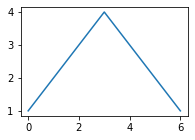

In [93]:
plt.figure(figsize=(3,2)) # 그림을 그리는 영역을 만드는 것 (도화지 생성)
plt.plot([1,2,3,4,3,2,1]) # 선 그리기 생성 함수
plt.show() # 화면에 그려라 함수

- **인덱스가 x 축으로 들어감 (아무것도 지정하지 않았을 시)**
- **value가 y축으로 들어감**

In [94]:
t = np.arange(0,12,0.01)
len(t)

1200

1200개의 ndarray가 생성됨

In [95]:
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.197e+01, 1.198e+01,
       1.199e+01])

In [96]:
y = np.sin(t)
len(y)

1200

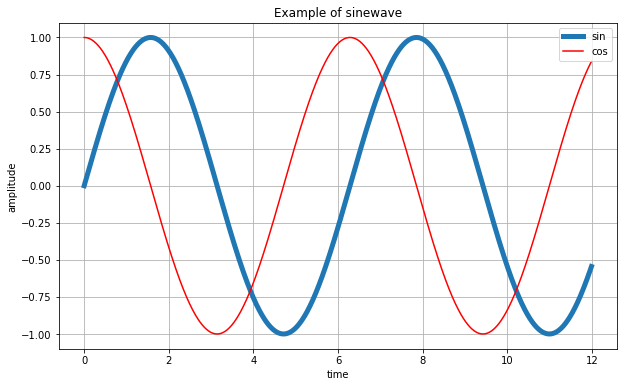

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),lw=5,  label='sin') # lw = line width
plt.plot(t,np.cos(t),'r', label='cos') # 'r' : Red
# x축과 y축
plt.legend() # 범주를 표시하라

plt.grid() # 그리드(격자) 적용

plt.xlabel('time') # x축 라벨 적용
plt.ylabel('amplitude') # y축 라벨 적용

plt.title('Example of sinewave') # 타이틀 적용
plt.show()

#### x축의 일정부분만 보고 싶을 때

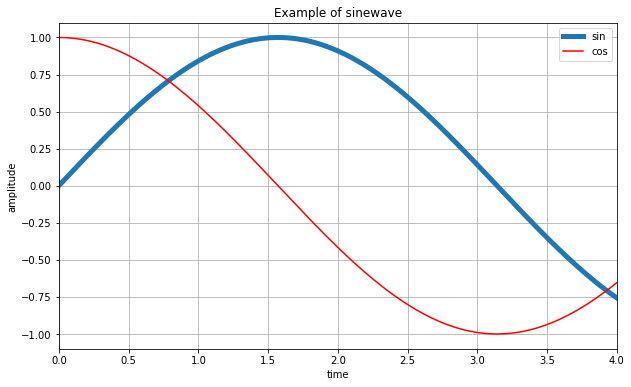

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),lw=5,  label='sin') # lw = line width
plt.plot(t,np.cos(t),'r', label='cos') # 'r' : Red
# x축과 y축
plt.legend() # 범주를 표시하라

plt.grid() # 그리드(격자) 적용

plt.xlabel('time') # x축 라벨 적용
plt.ylabel('amplitude') # y축 라벨 적용
plt.title('Example of sinewave') # 타이틀 적용

# X축 0~4 범위만 학위
plt.xlim(0,4) # 0부터 4사이의 값만 도출

plt.show()

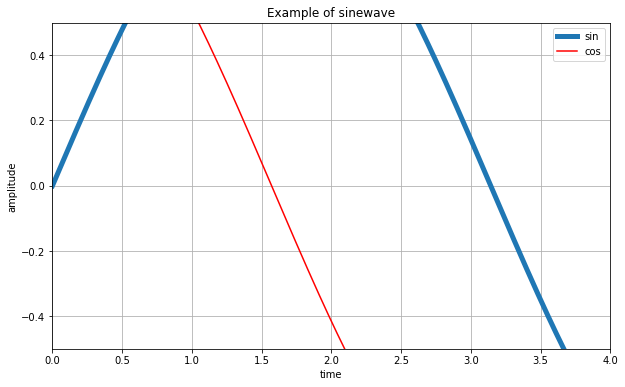

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),lw=5,  label='sin') # lw = line width
plt.plot(t,np.cos(t),'r', label='cos') # 'r' : Red
# x축과 y축
plt.legend() # 범주를 표시하라

plt.grid() # 그리드(격자) 적용

plt.xlabel('time') # x축 라벨 적용
plt.ylabel('amplitude') # y축 라벨 적용
plt.title('Example of sinewave') # 타이틀 적용

# X축 0~4 범위만 학위
plt.xlim(0,4) # 0부터 4사이의 값만 도출
plt.ylim(-0.5,0.5)# y출 ~0.5~0.5 범위만 도출

plt.show()

In [100]:
# plot : 색 지정, 모양 지정, 형태 지정
t = np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

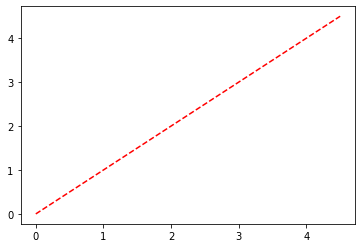

In [101]:
plt.figure(figsize=(6,4)) 
plt.plot(t,t, 'r--') # 실선이 아니라 - 형태로 나옴
plt.show()

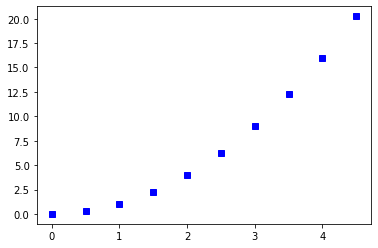

In [102]:
plt.figure(figsize=(6,4)) 
plt.plot(t,t**2, 'bs') # 앞에 있는 B는 BLUE, S는 SQUERE
plt.show()

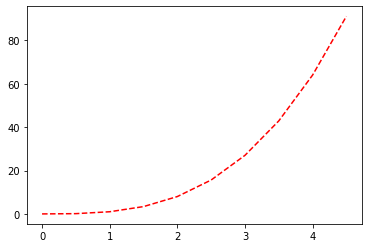

In [103]:
plt.figure(figsize=(6,4)) 
plt.plot(t,t**3, 'r--') # 실선이 아니라 - 형태로 나옴
plt.show()

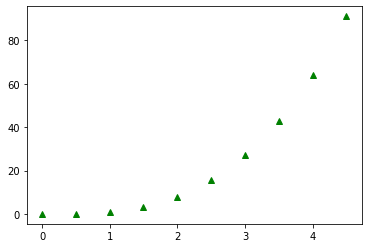

In [104]:
plt.figure(figsize=(6,4)) 
plt.plot(t,t**3, 'g^') # g : green ^ : 삼각형
plt.show()

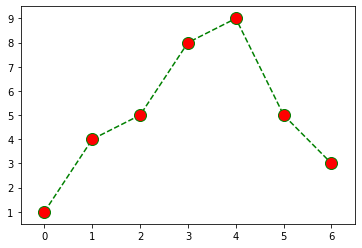

In [105]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

plt.figure(figsize=(6,4))
# 메모리에 그린 것!
# 컴퓨터에 실행되기 위해선 메모리에 그려야 함
plt.plot(t,y
         , color='green'
         , linestyle='dashed'
         , marker='o' # 사이사이 점이 찍힘
         , markerfacecolor='red'
         , markersize=12
        )
plt.xlim([-0.5, 6.5]) # x축 범위 지정
plt.ylim([0.5, 9.5]) # Y축 범위 지정 
plt.show() # 메모리에 있는 것을 끄집어 내서 show 하는 것! 

- 점들을 연결한 선을 표시한 것!
- 그림 하나가 각각의 object로 만들어진 것
    - 즉, 하나하나를 바꿀 수 있음

In [106]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

# 일반적으로 y =f(t) 형태

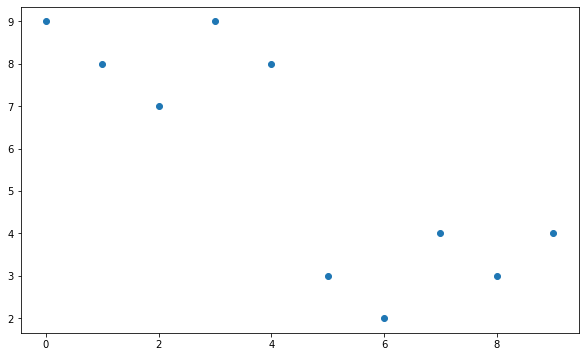

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(t,y) # 산점도 -> 점출력
plt.show()

컴퓨터에서 다루는 Vector는 (0,0)에서 출발!

#### 데이터는 Vector space 안에 있는 점이다.
  - 이 점을 가지고 머신러닝, 딥러닝 하는 것
  - 이 점을 표시하는 것이 scatter

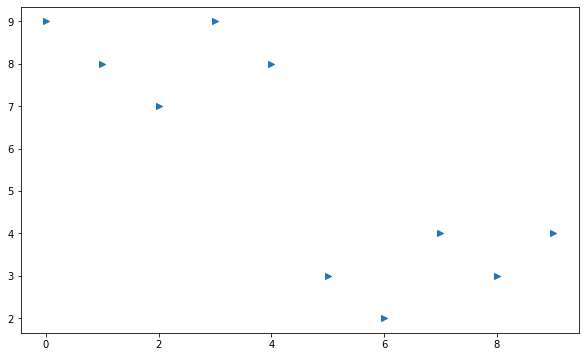

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

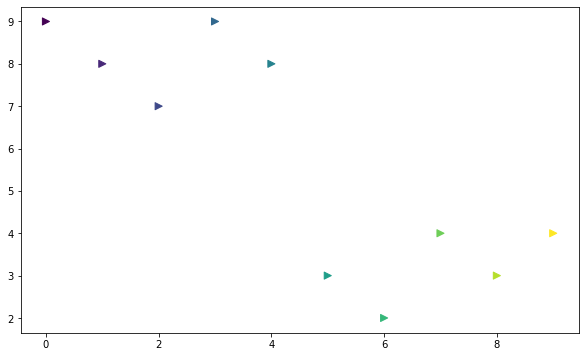

In [112]:
colormap=t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s =50, c = colormap, marker='>')
# s는 크기, c는 color
plt.show()

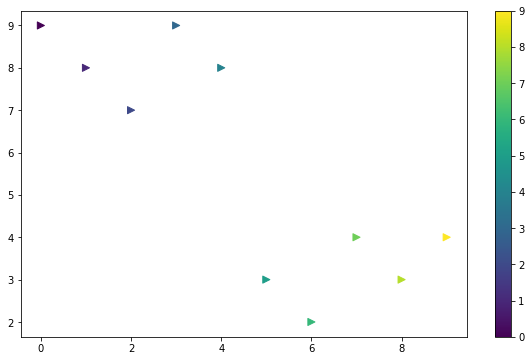

In [113]:
colormap=t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s =50, c = colormap, marker='>')
# s는 크기, c는 color
plt.colorbar() # t의 값에 의해서 색이 결정이 됨
plt.show()

In [114]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2= np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

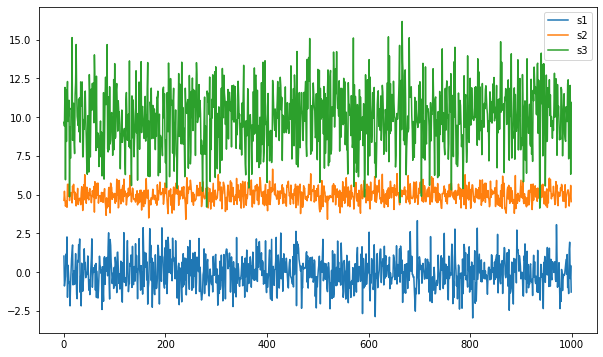

In [115]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

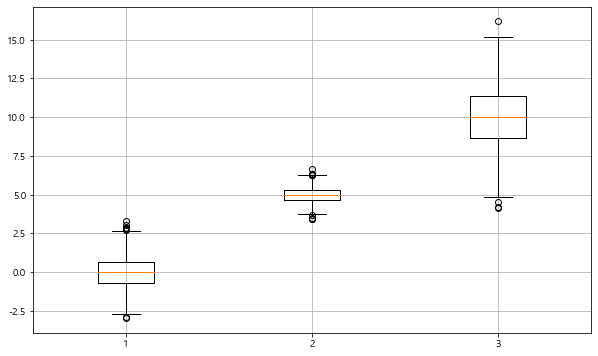

In [122]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

In [121]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "c:\windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

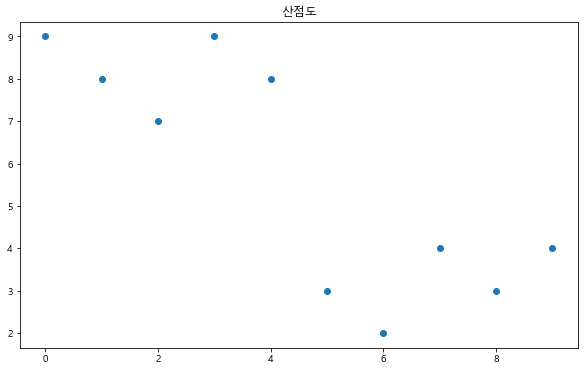

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(t,y) # 산점도 -> 점출력
plt.title('산점도')
plt.show()

In [124]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


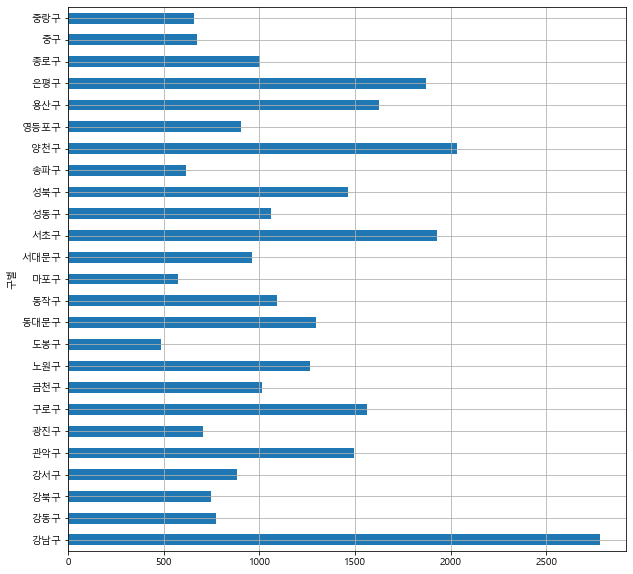

In [128]:
plt.figure()
data_result['소계'].plot(
      kind='barh' # barh => bar 를 h (수평)으로 주어라
    , grid=True
    , figsize=(10,10)
)
plt.show()

x => index, y => 소계

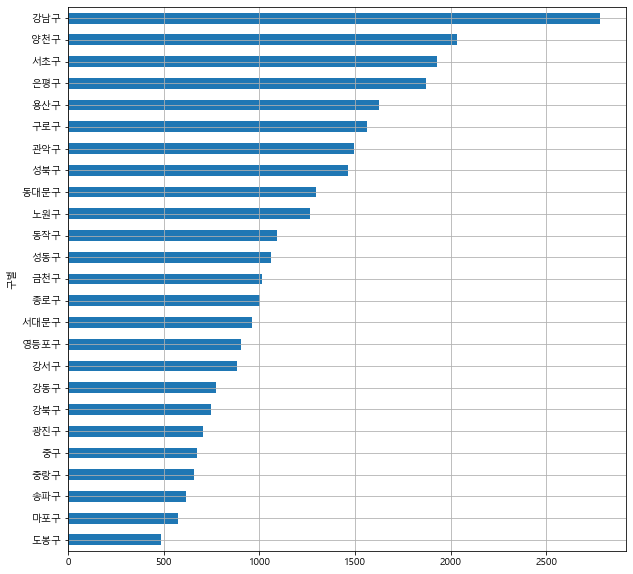

In [132]:
plt.figure()
data_result['소계'].sort_values().plot(
      kind='barh' # barh => bar 를 h (수평)으로 주어라
    , grid=True
    , figsize=(10,10)
)
plt.show()

In [134]:
# CCTV 현황 비율 : 소계 / 인구수 * 100
# 똑같이 인구로 나누면 다른 구랑 비교가 가능하다

data_result['CCTV비율'] = data_result['소계'] / \
data_result['인구수'] * 100

data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


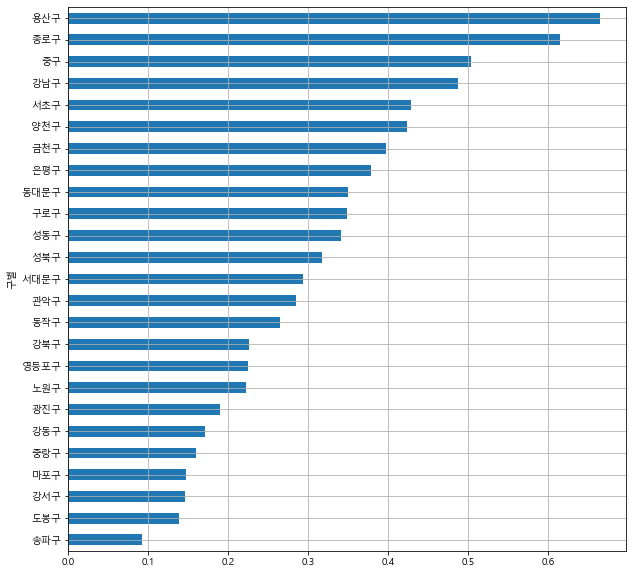

In [135]:
plt.figure()
data_result['CCTV비율'].sort_values().plot(
      kind='barh' # barh => bar 를 h (수평)으로 주어라
    , grid=True
    , figsize=(10,10)
)
plt.show()

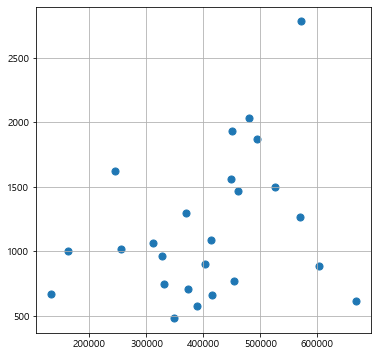

In [137]:
# 산점도 출력 (Position 확인 가능) 
# 산점도 : 인구수, CCTV 개수 (소계)
# 인구 대비 CCTV의 현황을 알 수 있음
# .이 나오면 선형회귀 계수를 알 수 있음

plt.figure(figsize=(6,6))
plt.scatter(
      data_result['인구수']
    , data_result['소계']
    , s=50
)
plt.grid()
plt.show()

### 데이터를 대표하는 직선 표시 (CCTV와 인구수는 양의 상관관계)
- y = ax + b => a 는 기울기 , b = 절편 
- a값과 b값을 구해주는 함수가 있음

- **함수**
    - **polyfit** : 지정한 특수 차수의 다항식 계수 구함
    - **poly1d** : 계수를 사용해서 실제 다항식 생성

In [142]:
# 인구수, 소계 계수 구하기
fp1 = np.polyfit(
      data_result['인구수']
    , data_result['소계']
    , 1
)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [144]:
# 다항식 생성 = 식(함수)를 만듦
# x(인구수) = 함수에 대입 => 소계
f1 = np.poly1d(fp1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [147]:
aaa = np.linspace(0,10,2) # 2는 계수 (0부터 10사이의 값을 2개로 나눠라!)
aaa

array([ 0., 10.])

In [149]:
# fx : f => function x => 인구수
# 100000 : start, 700000 : end, 100 : 100개로 분할
fx = np.linspace(100000, 700000, 100) # arange 와 비슷한 역할을 함
# 10만부터 70만까지를 100개로 분할하라
len(fx)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

#### 정해진 규격을 만들 때 주로 사용 : linspace

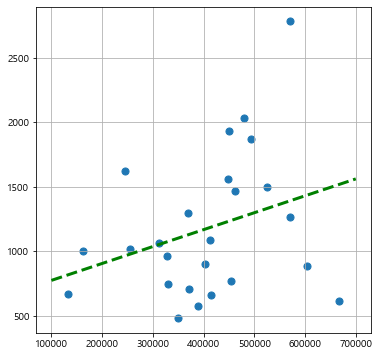

In [151]:
# 산점도 : 인구수, CCTV 개수 (소계)

plt.figure(figsize=(6,6))
plt.scatter(
      data_result['인구수']
    , data_result['소계']
    , s=50
)
## 인구대비 보편적인 CCTV 개수 (오차가 클 수록 문제가 생김)

# linerRegression : 계수를 구하는 것! (오차가 최소화되는 계수) => 보편적인 직선 생성
# fx : 100개 구간, f1: 계수가 적용된 함수
# plt.plot(fx(인구수), f1(fx), lw=3, color='g')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.grid()
plt.show()

In [153]:
## 각각의 것들에 대해 오차를 구함
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(
    data_result['소계'] - f1(data_result['인구수'])
) # 오차가 나옴

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)

df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


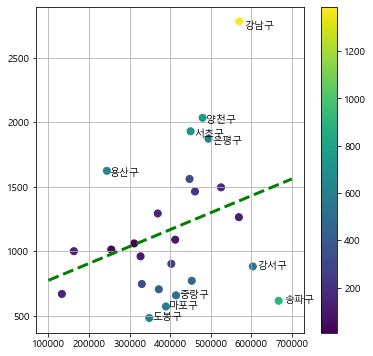

In [156]:
# 오차가 많은 10개 '구의 이름'을 표시

# 산점도 : 인구수, CCTV 개수 (소계)

plt.figure(figsize=(6,6))
plt.scatter(
      data_result['인구수']
    , data_result['소계']
    , s=50
    , c=data_result['오차'] # 오차값에 의해 색을 달리함
)
# fx : 100구간, f1 : 계수가 적용된 함수
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 오차가 많은 10개 "구(인덱스)의 이름" 표시
for n in range(10) : # 10번 반복
    plt.text(
          df_sort['인구수'][n] * 1.02 # 1. x축 위치 지정 => 1.02 => 2% 증가
        , df_sort['소계'][n] * 0.98 # 2. y축 위치 지정 => 0.98 => 0.2만큼 감소
        , df_sort.index[n] # 3. 출력될 값 => n번째 것을 가져와라
        , fontsize=10 # 4. 글자크기 지정
    ) # 차트에 텍스트 출력
plt.grid()
plt.colorbar()
plt.show()